<a href="https://colab.research.google.com/github/joelpawar08/All-DL-and-ML-Alogs-with-Examples/blob/master/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Import Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

print(f"TensorFlow version: {tf.__version__}")


TensorFlow version: 2.19.0


###Prepare Sample Text Data Using a simple story for demonstration


In [2]:
text = """
The quick brown fox jumps over the lazy dog.
The dog was sleeping under a tree.
A tree provides shade on a sunny day.
The sunny day was perfect for a walk.
The walk in the park was refreshing.
The park had many trees and flowers.
Flowers bloom in the spring season.
The spring season brings new life.
Life is full of surprises and joy.
Joy comes from simple moments.
"""

# Clean and prepare text
text = text.lower().strip()
print("Sample text:")
print(text[:200] + "...")
print(f"\nTotal characters: {len(text)}")


Sample text:
the quick brown fox jumps over the lazy dog.
the dog was sleeping under a tree.
a tree provides shade on a sunny day.
the sunny day was perfect for a walk.
the walk in the park was refreshing.
the par...

Total characters: 366


###Tokenization Convert words to numbers

In [3]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])

# Get total unique words
total_words = len(tokenizer.word_index) + 1
print(f"Total unique words: {total_words}")
print(f"\nWord Index (first 10):")
print(dict(list(tokenizer.word_index.items())[:10]))

# Convert text to sequences of integers
sequences = tokenizer.texts_to_sequences([text])[0]
print(f"\nFirst 20 tokens: {sequences[:20]}")


Total unique words: 45

Word Index (first 10):
{'the': 1, 'a': 2, 'was': 3, 'dog': 4, 'tree': 5, 'sunny': 6, 'day': 7, 'walk': 8, 'in': 9, 'park': 10}

First 20 tokens: [1, 17, 18, 19, 20, 21, 1, 22, 4, 1, 4, 3, 23, 24, 2, 5, 2, 5, 25, 26]


###Create Input Sequences Use N words to predict the next word


In [4]:
def create_sequences(sequence, seq_length):
    """Create sequences of length seq_length"""
    X, y = [], []
    for i in range(seq_length, len(sequence)):
        X.append(sequence[i-seq_length:i])
        y.append(sequence[i])
    return np.array(X), np.array(y)

# Use previous 3 words to predict next word
SEQ_LENGTH = 3

X, y = create_sequences(sequences, SEQ_LENGTH)

# Convert y to categorical (one-hot encoding)
y = to_categorical(y, num_classes=total_words)

print(f"X shape: {X.shape}")  # (samples, sequence_length)
print(f"y shape: {y.shape}")  # (samples, total_words)
print(f"\nExample sequence:")
print(f"Input: {X[0]} -> Output word index: {np.argmax(y[0])}")


X shape: (67, 3)
y shape: (67, 45)

Example sequence:
Input: [ 1 17 18] -> Output word index: 19


###Build LSTM Model for Word Prediction

In [6]:
model = Sequential([
    # Embedding layer: converts word indices to dense vectors
    Embedding(input_dim=total_words, output_dim=50),

    # LSTM layers
    LSTM(100, return_sequences=True),
    Dropout(0.2),

    LSTM(100),
    Dropout(0.2),

    # Dense layers
    Dense(50, activation='relu'),

    # Output layer: probability distribution over all words
    Dense(total_words, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Build the model explicitly to see parameters before training
model.build(input_shape=(None, SEQ_LENGTH))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 3, 50)          │         2,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 3, 100)         │        60,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 45)             │         2,295 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 150,395 (587.48 KB)

 Trainable params: 150,395 (587.48 KB)

 Non-trainable params: 0 (0.00 B)

###Train the Model

In [7]:
history = model.fit(
    X, y,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 610ms/step - accuracy: 0.0607 - loss: 3.8069 - val_accuracy: 0.0000e+00 - val_loss: 3.8082
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.1861 - loss: 3.8031 - val_accuracy: 0.0000e+00 - val_loss: 3.8103
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.1631 - loss: 3.8003 - val_accuracy: 0.0000e+00 - val_loss: 3.8128
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.1215 - loss: 3.7963 - val_accuracy: 0.0000e+00 - val_loss: 3.8157
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.1527 - loss: 3.7914 - val_accuracy: 0.0000e+00 - val_loss: 3.8190
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.1527 - loss: 3.7864 - val_accuracy: 0.0000e+00 - val_loss: 3.8228
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.1527 - loss: 3.7819 - val_accuracy: 0.0000e+00 - val_loss: 3.8271
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.1319 - loss: 3.7742 - val

###Plot Training History

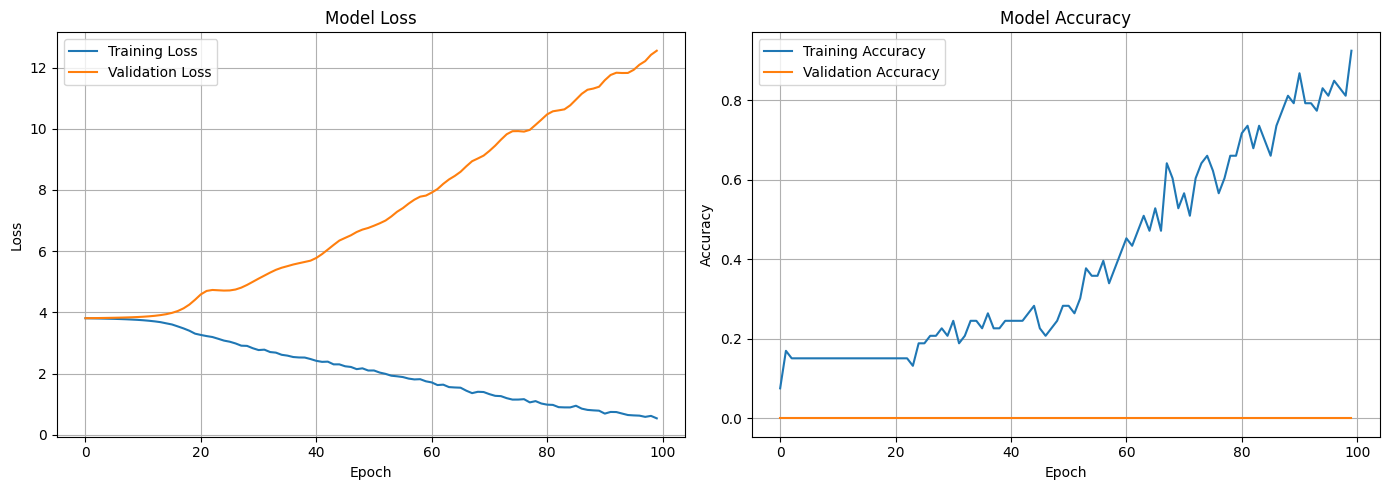

In [8]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()

###Predict Next Word Function

In [9]:
def predict_next_word(model, tokenizer, text, seq_length):
    """Predict the next word given input text"""
    # Tokenize input text
    token_list = tokenizer.texts_to_sequences([text.lower()])[0]

    # Take last seq_length tokens
    if len(token_list) < seq_length:
        print(f"Please provide at least {seq_length} words")
        return None

    token_list = token_list[-seq_length:]
    token_list = np.array([token_list])

    # Predict
    predictions = model.predict(token_list, verbose=0)
    predicted_index = np.argmax(predictions, axis=1)[0]

    # Convert index back to word
    for word, index in tokenizer.word_index.items():
        if index == predicted_index:
            return word
    return None

# Test prediction
test_text = "the quick brown"
next_word = predict_next_word(model, tokenizer, test_text, SEQ_LENGTH)
print(f"\nInput: '{test_text}'")
print(f"Predicted next word: '{next_word}'")


Input: 'the quick brown'
Predicted next word: 'fox'


###Mutiple Tests



In [10]:
# ============================================
# Generate Text Sequence
# ============================================
def generate_text(model, tokenizer, seed_text, num_words, seq_length):
    """Generate a sequence of words"""
    result = seed_text

    for _ in range(num_words):
        # Predict next word
        next_word = predict_next_word(model, tokenizer, result, seq_length)
        if next_word is None:
            break
        result += " " + next_word

    return result

# Generate text
seed_text = "the quick brown"
generated = generate_text(model, tokenizer, seed_text, num_words=10, seq_length=SEQ_LENGTH)

print("\n" + "="*50)
print("TEXT GENERATION")
print("="*50)
print(f"\nSeed text: '{seed_text}'")
print(f"\nGenerated text:\n{generated}")


# ============================================
#  Interactive Prediction
# Test with multiple examples
# ============================================
print("\n" + "="*50)
print("TESTING MULTIPLE PREDICTIONS")
print("="*50)

test_phrases = [
    "the quick brown",
    "the dog was",
    "a tree provides",
    "the sunny day",
    "flowers bloom in"
]

for phrase in test_phrases:
    next_word = predict_next_word(model, tokenizer, phrase, SEQ_LENGTH)
    print(f"\n'{phrase}' -> '{next_word}'")


# ============================================
# Prediction with Top N Candidates
# Show multiple possible next words
# ============================================
def predict_top_n_words(model, tokenizer, text, seq_length, top_n=5):
    """Get top N most likely next words"""
    token_list = tokenizer.texts_to_sequences([text.lower()])[0]

    if len(token_list) < seq_length:
        print(f"Please provide at least {seq_length} words")
        return None

    token_list = token_list[-seq_length:]
    token_list = np.array([token_list])

    # Get predictions
    predictions = model.predict(token_list, verbose=0)[0]

    # Get top N indices
    top_indices = np.argsort(predictions)[-top_n:][::-1]

    # Convert to words with probabilities
    results = []
    for idx in top_indices:
        for word, index in tokenizer.word_index.items():
            if index == idx:
                results.append((word, predictions[idx]))
                break

    return results

# Test with top 5 predictions
test_text = "the quick brown"
top_predictions = predict_top_n_words(model, tokenizer, test_text, SEQ_LENGTH, top_n=5)

print(f"\n" + "="*50)
print(f"TOP 5 PREDICTIONS for '{test_text}'")
print("="*50)
for i, (word, prob) in enumerate(top_predictions, 1):
    print(f"{i}. '{word}' - Probability: {prob:.4f} ({prob*100:.2f}%)")


TEXT GENERATION

Seed text: 'the quick brown'

Generated text:
the quick brown fox jumps over the lazy dog the dog was sleeping

TESTING MULTIPLE PREDICTIONS

'the quick brown' -> 'fox'

'the dog was' -> 'sleeping'

'a tree provides' -> 'shade'

'the sunny day' -> 'was'

'flowers bloom in' -> 'the'

TOP 5 PREDICTIONS for 'the quick brown'
1. 'fox' - Probability: 0.6893 (68.93%)
2. 'was' - Probability: 0.1443 (14.43%)
3. 'sleeping' - Probability: 0.1259 (12.59%)
4. 'the' - Probability: 0.0165 (1.65%)
5. 'dog' - Probability: 0.0137 (1.37%)


###Model Evaluations

In [11]:
train_loss, train_acc = model.evaluate(X, y, verbose=0)

print("\n" + "="*50)
print("MODEL PERFORMANCE")
print("="*50)
print(f"Training Loss: {train_loss:.4f}")
print(f"Training Accuracy: {train_acc:.4f} ({train_acc*100:.2f}%)")
print(f"\nTotal unique words in vocabulary: {total_words}")
print(f"Sequence length used: {SEQ_LENGTH} words")
print(f"Total training samples: {len(X)}")


MODEL PERFORMANCE
Training Loss: 2.9893
Training Accuracy: 0.7463 (74.63%)

Total unique words in vocabulary: 45
Sequence length used: 3 words
Total training samples: 67
